In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Ecommerce_Sales_Prediction_Dataset.csv')

In [ ]:
df.head()


,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
df.isnull().sum()

,0
Date,0
Product_Category,0
Price,0
Discount,0
Customer_Segment,0
Marketing_Spend,0
Units_Sold,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df1 = df.copy()
df1

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16
2,2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27
3,2023-01-04,Toys,923.27,0.61,Premium,9422.75,29
4,2023-01-05,Toys,710.17,47.83,Premium,1756.83,17
...,...,...,...,...,...,...,...
995,2025-09-22,Fashion,740.06,49.06,Regular,1890.83,34
996,2025-09-23,Electronics,517.10,28.48,Premium,8011.66,21
997,2025-09-24,Electronics,683.43,12.98,Occasional,3408.51,19
998,2025-09-25,Sports,51.26,21.85,Occasional,7335.62,26


In [ ]:
df1['year'] = [date.year for date in df1['Date']]
df1['month'] = [date.month for date in df1['Date']]
df1['day'] = [date.day for date in df1['Date']]

In [ ]:
df1['Revenue'] = df1['Price']*df1['Units_Sold']

In [ ]:
df1

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,year,month,day,Revenue
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,2023,1,1,29849.60
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,2023,1,2,9111.68
2,2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27,2023,1,3,18891.36
3,2023-01-04,Toys,923.27,0.61,Premium,9422.75,29,2023,1,4,26774.83
4,2023-01-05,Toys,710.17,47.83,Premium,1756.83,17,2023,1,5,12072.89
...,...,...,...,...,...,...,...,...,...,...,...
995,2025-09-22,Fashion,740.06,49.06,Regular,1890.83,34,2025,9,22,25162.04
996,2025-09-23,Electronics,517.10,28.48,Premium,8011.66,21,2025,9,23,10859.10
997,2025-09-24,Electronics,683.43,12.98,Occasional,3408.51,19,2025,9,24,12985.17
998,2025-09-25,Sports,51.26,21.85,Occasional,7335.62,26,2025,9,25,1332.76


In [ ]:
df1_year = df1.groupby('year')['Revenue'].sum()
df1_year

,Revenue
year,
2023,5475563.35
2024,5552401.48
2025,3974519.73


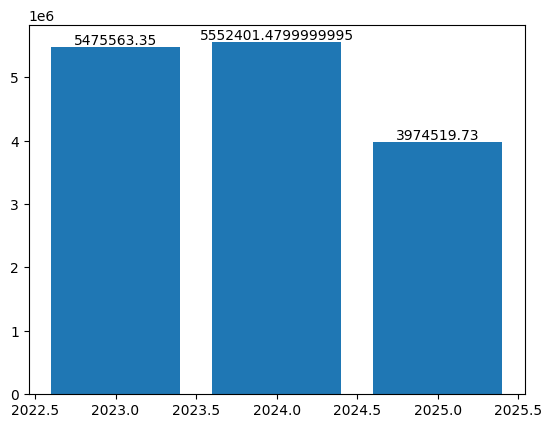

In [ ]:
bar = plt.bar(x=df1_year.index, height=df1_year.values, label=['2023', '2024', '2025'])
plt.bar_label(bar, df1_year.values)
plt.show()

In [ ]:
df1_month = df1.groupby('month')['Revenue'].sum()
df1_month

,Revenue
month,
1,1392038.74
2,1241581.42
3,1310908.28
4,1213502.60
5,1373971.49
6,1311010.43
7,1464738.93
8,1346581.02
9,1366404.50


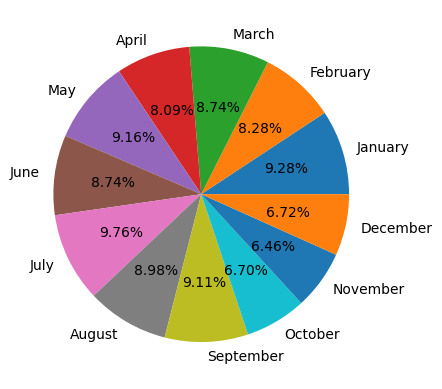

In [ ]:
plt.pie(df1_month, autopct="%1.2f%%", labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

In [ ]:
categorical_cols = []
numerical_cols = []
for col in df.columns[1:]:
    if df[col].dtypes==object:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [ ]:
categorical_cols

['Product_Category', 'Customer_Segment']

In [ ]:
numerical_cols

['Price', 'Discount', 'Marketing_Spend', 'Units_Sold']

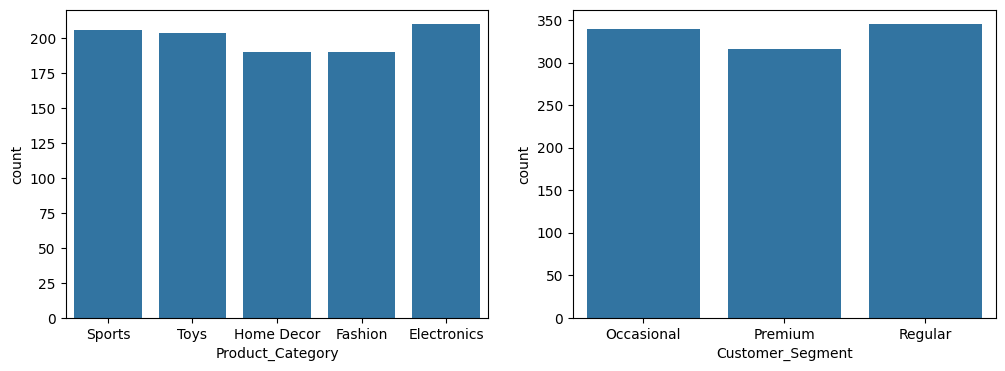

In [ ]:
plt.figure(figsize=(12,4))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(x=df[col])
plt.show()


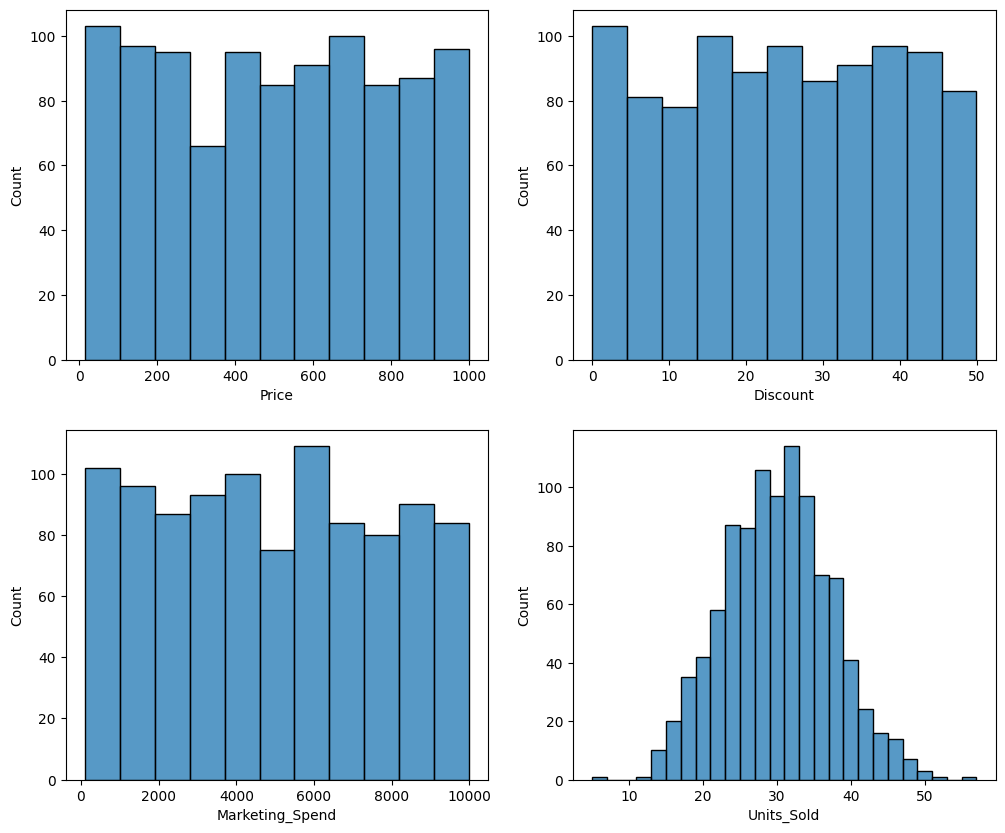

In [ ]:
plt.figure(figsize=(12,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[col])
plt.show()

In [ ]:
df2 = df.copy()
df2

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16
2,2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27
3,2023-01-04,Toys,923.27,0.61,Premium,9422.75,29
4,2023-01-05,Toys,710.17,47.83,Premium,1756.83,17
...,...,...,...,...,...,...,...
995,2025-09-22,Fashion,740.06,49.06,Regular,1890.83,34
996,2025-09-23,Electronics,517.10,28.48,Premium,8011.66,21
997,2025-09-24,Electronics,683.43,12.98,Occasional,3408.51,19
998,2025-09-25,Sports,51.26,21.85,Occasional,7335.62,26


In [ ]:
df2 = df2.set_index('Date')
df2

,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
Date,,,,,,
2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32
2023-01-02,Toys,569.48,3.60,Premium,6807.56,16
2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27
2023-01-04,Toys,923.27,0.61,Premium,9422.75,29
2023-01-05,Toys,710.17,47.83,Premium,1756.83,17
...,...,...,...,...,...,...
2025-09-22,Fashion,740.06,49.06,Regular,1890.83,34
2025-09-23,Electronics,517.10,28.48,Premium,8011.66,21
2025-09-24,Electronics,683.43,12.98,Occasional,3408.51,19


In [ ]:
df2['Customer_Segment'].unique()

array(['Occasional', 'Premium', 'Regular'], dtype=object)

In [ ]:
df2['Product_Category'] = df2['Product_Category'].map({'Sports':0, 'Toys':1, 'Home Decor':2, 'Fashion':3, 'Electronics':4})
df2['Customer_Segment'] = df2['Customer_Segment'].map({'Occasional':0, 'Premium':1, 'Regular':2})

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [ ]:
df2[numerical_cols] = mms.fit_transform(df2[numerical_cols])

In [ ]:
df2

,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
Date,,,,,,
2023-01-01,0,0.932354,0.717491,0,0.675075,0.519231
2023-01-02,1,0.563437,0.071929,1,0.677821,0.211538
2023-01-03,2,0.695643,0.071128,1,0.373268,0.423077
2023-01-04,1,0.922677,0.012022,1,0.942107,0.461538
2023-01-05,1,0.706294,0.958125,1,0.167405,0.230769
...,...,...,...,...,...,...
2025-09-22,3,0.736645,0.982769,2,0.180947,0.557692
2025-09-23,4,0.510251,0.570427,1,0.799505,0.307692
2025-09-24,4,0.679143,0.259868,0,0.334321,0.269231


In [ ]:
df2.describe()

,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.994000,0.498210,0.499093,1.006000,0.486344,0.473673
std,1.435278,0.294255,0.289320,0.827435,0.287065,0.139769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.232276,0.260168,0.000000,0.233719,0.365385
50%,2.000000,0.502341,0.500000,1.000000,0.478706,0.480769
75%,3.000000,0.744293,0.752404,2.000000,0.729575,0.557692
max,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000


<Axes: >

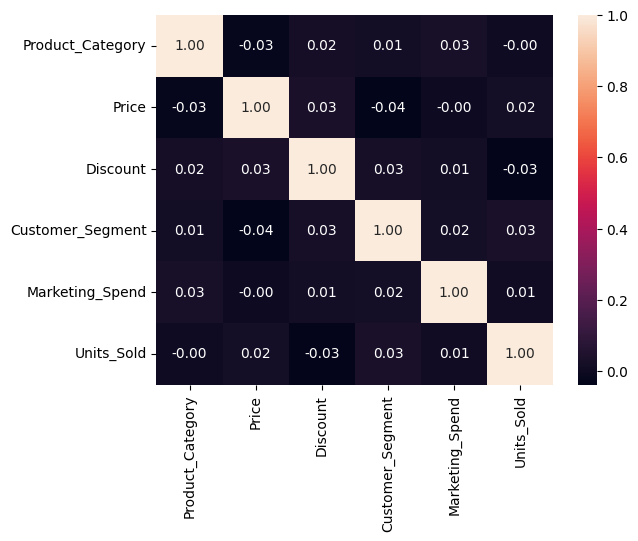

In [ ]:
sns.heatmap(df2.corr(), annot=True, fmt='0.2f')

In [ ]:
df2.columns

Index(['Product_Category', 'Price', 'Discount', 'Customer_Segment',
       'Marketing_Spend', 'Units_Sold'],
      dtype='object')

In [ ]:
x = df2[['Price', 'Discount','Marketing_Spend']]
y = df2['Units_Sold']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
y_test

,Units_Sold
Date,
2025-09-20,0.576923
2025-05-09,0.461538
2023-10-26,0.461538
2024-07-07,0.673077
2024-11-03,0.461538
...,...
2024-11-10,0.576923
2024-12-23,0.153846
2023-08-04,0.423077


In [ ]:
def model_fit_and_results(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results = {
        'Model': model_name,
        'R2 Score': r2_score(y_test, y_pred),
        'Mean Squared Error': mean_squared_error(y_test, y_pred),
    }
    return results

In [ ]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          MLPRegressor()]

In [ ]:
models_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Multi-Layer Perceptron']

In [ ]:
results_list=[]
for i in range(len(models)):
    result = model_fit_and_results(models[i], models_names[i], x_train, x_test, y_train, y_test)
    print(f"{models_names[i]}: {result}")
    results_list.append(result)

Linear Regression: {'Model': 'Linear Regression', 'R2 Score': -0.035059554763052336, 'Mean Squared Error': 0.018598525410792738}
Decision Tree: {'Model': 'Decision Tree', 'R2 Score': -1.1097217927232554, 'Mean Squared Error': 0.03790865384615385}
Random Forest: {'Model': 'Random Forest', 'R2 Score': -0.1583644382059184, 'Mean Squared Error': 0.02081413609467456}
Gradient Boosting: {'Model': 'Gradient Boosting', 'R2 Score': -0.1346696311933382, 'Mean Squared Error': 0.02038837463167528}
Multi-Layer Perceptron: {'Model': 'Multi-Layer Perceptron', 'R2 Score': -0.039122395939768184, 'Mean Squared Error': 0.018671528799358586}


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.4483 - val_loss: 1.0739
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0348 - val_loss: 0.9287
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9270 - val_loss: 0.8364
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8173 - val_loss: 0.7418
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7292 - val_loss: 0.6635
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6517 - val_loss: 0.5897
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5737 - val_loss: 0.5303
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5145 - val_loss: 0.4750
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4629 - val_loss: 0.4285
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4044 - val_loss: 0.3890
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3739 - val_loss: 0.3514
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3346 - val_loss: 0.31

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Mean Squared Error: 0.08866086797237271
R-squared: -0.01901443057020602


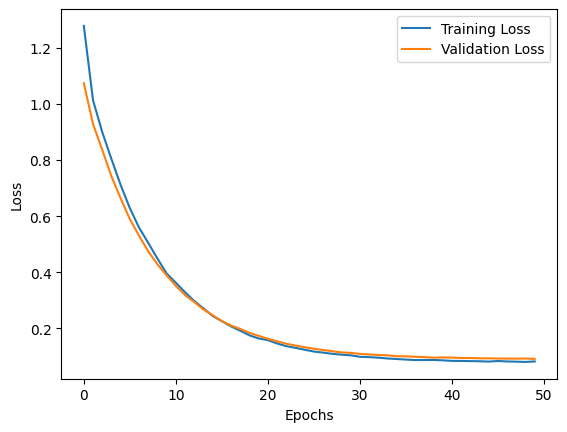

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1)
])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

# Fit the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

𝗖𝗢𝗡𝗖𝗟𝗨𝗦𝗜𝗢𝗡

● This project leveraged regression modeling to unlock data-driven sales forecasting, offering valuable insights into the impact of pricing, discounts, customer segments, and marketing spend on revenue. Key takeaways include:

● Marketing spend optimization: A well-planned budget directly boosts sales.

● Discount strategy refinement: Striking the right balance prevents revenue loss.

● Customer segmentation insights: Different groups respond uniquely to pricing and promotions.

● By transforming raw data into actionable intelligence, this project empowers businesses to enhance sales strategies, optimize resources, and drive sustainable growth in the competitive e-commerce landscape